#  Kaggle - Hotel Bookings Demand (IML Seminar 20/21)

## Model Optimization

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (precision_score,f1_score,recall_score,accuracy_score,make_scorer)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

load dataset

In [2]:
import pandas as pd

df = pd.read_csv("../datasets/dataset_preprocessed.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118726 entries, 0 to 118725
Data columns (total 91 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118726 non-null  int64  
 1   lead_time                       118726 non-null  int64  
 2   arrival_date_week_number        118726 non-null  int64  
 3   arrival_date_day_of_month       118726 non-null  int64  
 4   stays_in_weekend_nights         118726 non-null  int64  
 5   stays_in_week_nights            118726 non-null  int64  
 6   adults                          118726 non-null  int64  
 7   children                        118726 non-null  int64  
 8   babies                          118726 non-null  int64  
 9   previous_cancellations          118726 non-null  int64  
 10  previous_bookings_not_canceled  118726 non-null  int64  
 11  booking_changes                 118726 non-null  int64  
 12  days_in_waiting_

split dataset into train and test data, using 80:20 ratio

In [3]:
from sklearn.model_selection import train_test_split

labels = df.iloc[:,0]
features = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(93371, 82) (23343, 82) (93371,) (23343,)


Testing the model with the default hyperparameter settings according to sklearn. 
Performing Hyperparameter optimization, by GridSearch and RandomGridSearch in an iterative greedy approach.
Using CrossValidation for optimization. Using accuracy and F1 as evaluation metrics.

## Random Forest

#### default

In [5]:
rfc_def = RandomForestClassifier()

scores = ["accuracy","recall","precision","f1"]

rfc_def_cv = cross_validate(rfc_def,X_train,y_train,scoring=scores,n_jobs=-1, return_estimator=True)

In [7]:
rfc_def_res = pd.DataFrame({"accuracy":rfc_def_cv["test_accuracy"],
                          "precision":rfc_def_cv["test_precision"],
                          "recall":rfc_def_cv["test_recall"],
                          "F1":rfc_def_cv["test_f1"]})
rfc_def_res

,accuracy,precision,recall,F1
0,0.875395,0.878866,0.775992,0.824231
1,0.877959,0.876545,0.786659,0.829173
2,0.874692,0.882689,0.769450,0.822188
3,0.876834,0.875536,0.784383,0.827457
4,0.878762,0.878754,0.786517,0.830081


In [11]:
#rfc_def_res.to_csv("RF_DefaultCV.csv")

estimate test accuracy

In [13]:
rfc_def.fit(X_train,y_train)
y_pred = rfc_def.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

rfc_def_test = pd.DataFrame({"accuracy":[acc],
                          "precision":[prec],
                          "recall":[rec],
                          "F1":[f1]})

In [158]:
rfc_def_test

,accuracy,precision,recall,F1
0,0.881421,0.880883,0.790184,0.833072


In [15]:
#rfc_def_test.to_csv("RF_Default_Test.csv")

#### hyperparameter search

In [17]:
rfc = RandomForestClassifier()

params_RF_1 = [
    {
    "n_estimators":[1000],
    #"max_depth":[],
    "min_samples_split":[int(i) for i in np.linspace(2,20,5)],
    #"min_samples_leaf":[],
    "max_features":[0.1,0.2,0.3,0.4,0.5],
    "bootstrap":[True],
    "max_samples":[0.5,0.75,1.0]
    },
    {
    "n_estimators":[1000],
    #"max_depth":[],
    "min_samples_split":[int(i) for i in np.linspace(2,20,5)],
    #"min_samples_leaf":[],
    "max_features":[0.1,0.2,0.3,0.4,0.5],
    "bootstrap":[False]
    }
    ]

scores=["accuracy","f1"]

RF_RandSearch_1 = RandomizedSearchCV(rfc,params_RF_1,scoring=scores,cv=5,n_jobs=-1,refit="accuracy", n_iter=40)
RF_RandSearch_1.fit(X_train,y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [18]:
RF_RandSearch_1_res_df = pd.DataFrame(RF_RandSearch_1.cv_results_)
RF_RandSearch_1_res_df.to_csv("RF_RandomGridCV.csv")

best one according to CV accuracy, estimate test performance

In [19]:
RF_best_acc_RGSCV = RF_RandSearch_1.best_estimator_

In [20]:
y_pred = RF_best_acc_RGSCV.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

RF_best_acc_RGSCV_test = pd.DataFrame({"accuracy":[acc],
                          "precision":[prec],
                          "recall":[rec],
                          "F1":[f1]})

In [173]:
RF_best_acc_RGSCV_test

,accuracy,precision,recall,F1
0,0.883777,0.885817,0.791671,0.836102


In [21]:
#RF_best_acc_RGSCV_test.to_csv("RF_best_acc_RGSCV_Test.csv")

analyze variation of accuracy and F1 among tested model hyperparameters 

In [163]:
RF_RandSearch_1_res_df["mean_test_accuracy"].describe()

count    32.000000
mean      0.871927
std       0.004309
min       0.862034
25%       0.869413
50%       0.873333
75%       0.874977
max       0.877960
Name: mean_test_accuracy, dtype: float64

In [164]:
RF_RandSearch_1_res_df["mean_test_f1"].describe()

count    32.000000
mean      0.819625
std       0.007902
min       0.802155
25%       0.814705
50%       0.822239
75%       0.825503
max       0.829074
Name: mean_test_f1, dtype: float64

In [172]:
pd.set_option('display.max_columns', 30) 
RF_RandSearch_1_res_df.sort_values("mean_test_accuracy",ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_samples,param_max_features,param_bootstrap,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
39,554.022534,126.279439,14.567671,2.303152,1000,6,NaN,0.1,False,"{'n_estimators': 1000, 'min_samples_split': 6,...",0.875770,0.880315,0.875870,0.878173,0.879672,0.877960,0.001881,1,0.824296,0.832547,0.823592,0.829371,0.831040,0.828169,0.003600,4
38,687.999167,1.262040,28.248749,5.732610,1000,2,NaN,0.1,False,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.875395,0.880101,0.875924,0.878976,0.877691,0.877617,0.001779,2,0.825077,0.833371,0.825224,0.831995,0.829705,0.829074,0.003411,1
19,508.565583,6.026734,12.930037,0.213621,1000,2,0.75,0.2,True,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.875930,0.877102,0.875924,0.878173,0.878173,0.877060,0.001005,3,0.826038,0.829305,0.824695,0.829983,0.830262,0.828057,0.002258,5
13,928.021407,4.837095,15.980929,0.587941,1000,2,NaN,0.2,False,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.875341,0.877263,0.875924,0.876031,0.877316,0.876375,0.000783,4,0.826243,0.831098,0.826559,0.828937,0.830434,0.828654,0.001971,2
20,1201.738460,5.210209,14.045525,0.182057,1000,6,NaN,0.3,False,"{'n_estimators': 1000, 'min_samples_split': 6,...",0.874592,0.876352,0.875281,0.878494,0.876352,0.876214,0.001322,5,0.825562,0.829380,0.825163,0.831864,0.829026,0.828199,0.002517,3
36,298.203123,1.121221,16.342469,0.232442,1000,2,0.5,0.1,True,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.874431,0.877905,0.874157,0.875388,0.877905,0.875957,0.001642,6,0.821442,0.827664,0.819785,0.823538,0.827430,0.823972,0.003153,11
8,1182.779558,3.895134,13.689962,0.176252,1000,11,NaN,0.3,False,"{'n_estimators': 1000, 'min_samples_split': 11...",0.875556,0.875335,0.874799,0.876245,0.876245,0.875636,0.000555,7,0.825970,0.827274,0.823680,0.827987,0.827961,0.826574,0.001622,7
35,1184.330323,4.227752,14.165894,0.441774,1000,2,0.75,0.5,True,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.874270,0.875442,0.873835,0.877744,0.876245,0.875507,0.001406,8,0.825298,0.828390,0.823785,0.831077,0.829131,0.827536,0.002642,6
34,628.886851,3.735528,16.851395,0.247183,1000,15,NaN,0.1,False,"{'n_estimators': 1000, 'min_samples_split': 15...",0.873467,0.876459,0.873996,0.873942,0.876138,0.874801,0.001241,9,0.819632,0.824896,0.818902,0.821097,0.824360,0.821778,0.002438,17
7,393.322859,3.292304,12.687417,0.283541,1000,2,0.5,0.2,True,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.873253,0.874157,0.873942,0.874960,0.877477,0.874758,0.001465,10,0.821480,0.823944,0.821016,0.824396,0.828383,0.823844,0.002627,13


best one according to F1, estimate test performance

In [178]:
RF_best_f1_RGSCV = RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=0.1,bootstrap=False)
RF_best_f1_RGSCV.fit(X_train,y_train)
y_pred = RF_best_f1_RGSCV.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

RF_best_f1_RGSCV_test = pd.DataFrame({"accuracy":[acc],
                                      "precision":[prec],
                                      "recall":[rec],
                                      "F1":[f1]})

In [180]:
RF_best_f1_RGSCV_test

,accuracy,precision,recall,F1
0,0.88322,0.878826,0.798192,0.836571


In [181]:
#RF_best_f1_RGSCV_test.to_csv("RF_best_f1_RGSCV_Test.csv")

best one with bootstrap=True according to accuracy (but at the same time for F1)

In [182]:
RF_best_bootstrap_RGSCV = RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=0.2,max_samples=0.75,bootstrap=True)
RF_best_bootstrap_RGSCV.fit(X_train,y_train)
y_pred = RF_best_bootstrap_RGSCV.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

RF_best_bootstrap_RGSCV_test = pd.DataFrame({"accuracy":[acc],
                                      "precision":[prec],
                                      "recall":[rec],
                                      "F1":[f1]})

In [183]:
RF_best_bootstrap_RGSCV_test

,accuracy,precision,recall,F1
0,0.882577,0.879267,0.795676,0.835385


checking built in feature importances for possible feature selection

In [ ]:
importances = RF_best_acc_RGSCV.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_best_acc_RGSCV.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

p = X_train.shape[1]
features = X_train.columns
for f in range(p):
    print("%d: %d, %s, importance: (%f)" % (f+1, indices[f], features[indices[f]], importances[indices[f]]))

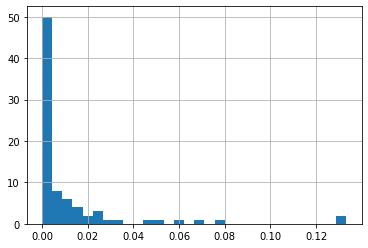

In [345]:
pd.Series(importances).hist(bins=30)

In [346]:
pd.Series(importances).describe()

count    82.000000
mean      0.012195
std       0.024619
min       0.000000
25%       0.000955
50%       0.002876
75%       0.012385
max       0.133313
dtype: float64

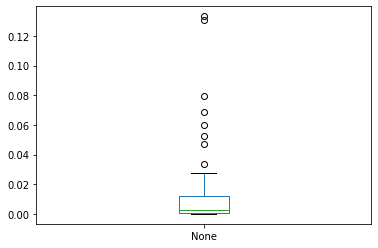

In [357]:
pd.Series(importances).plot.box()

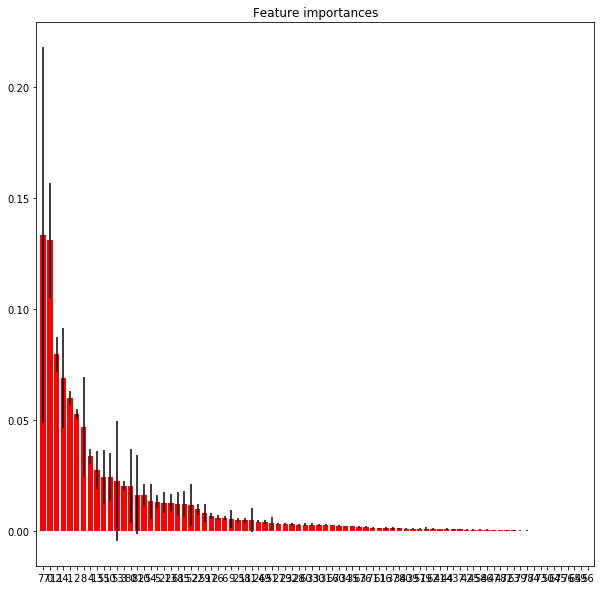

In [269]:
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(p), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(p), indices)
plt.xlim([-1, p])
plt.show()

In [ ]:
'''
Based on the feature importance of the RandomForest and the 0 coefficients of L1 LogReg and the non-significance 
of coefficients in the logReg GAM model, the following features seem to have only little influence:

GAM: 
7, 15, 16, 49, 56, 65, 75, 76, 78, 79, 81
L1:
48, 56, 65, 76
RF:
see above
'''

# Logistic Regression L2 Loss

#### default

In [26]:
logReg_def = LogisticRegression(max_iter=1000)

scores = ["accuracy","recall","precision","f1"]

logReg_def_cv = cross_validate(logReg_def,X_train,y_train,scoring=scores,n_jobs=-1, return_estimator=True)

In [27]:
logReg_def_res = pd.DataFrame({"accuracy":logReg_def_cv["test_accuracy"],
                          "precision":logReg_def_cv["test_precision"],
                          "recall":logReg_def_cv["test_recall"],
                          "F1":logReg_def_cv["test_f1"]})
logReg_def_res

In [28]:
#logReg_def_res.to_csv("logReg_L2_DefaultCV.csv")

In [189]:
logReg_def = LogisticRegression(max_iter=5000)
logReg_def.fit(X_train,y_train)
y_pred = logReg_def.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_def_test = pd.DataFrame({"accuracy":[acc],
                          "precision":[prec],
                          "recall":[rec],
                          "F1":[f1]})

In [190]:
logReg_def_test

,accuracy,precision,recall,F1
0,0.813392,0.805916,0.660794,0.726176


In [201]:
#logReg_def_test.to_csv("logReg_L2_Default_Test.csv")

#### hyperparameter search

In [125]:
logReg = LogisticRegression(max_iter=1000)

# logspaced penalization parameter
params_logReg_L2 = {
    "C":np.round(np.logspace(-2,3,100),5)
}

scores=["accuracy","f1"]

logReg_L2_GSCV = GridSearchCV(logReg,params_logReg_L2,scoring=scores,cv=5,n_jobs=-1,refit=False)
logReg_L2_GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.0000000e-02, 1.123...
       1.0974988e+02, 1.2328467e+02, 1.3848864e+02, 1.5556761e+02,
       1.7475284e+02, 1.9630407e+02, 2.2051307e+02, 2.4770764e+02,
       2.7825594e+02, 3.1257158e+02, 3.5111917e+02, 3.9442061e+02,
       4.4306215e+02, 4.9770236e+02, 5.5908102e+02, 6.2802914e+02,
       7.0548023e+02, 7.

In [200]:
# summary of tested penalization parameters
pd.DataFrame(params_logReg_L2).describe()

,C
count,100.000000
mean,91.086385
std,200.736196
min,0.010000
25%,0.178047
50%,3.167625
75%,56.306845
max,1000.000000


In [126]:
pd.set_option("display.max_columns", 42)
logReg_L2_GSCV_res = pd.DataFrame(logReg_L2_GSCV.cv_results_)

In [127]:
#logReg_L2_GSCV_res.to_csv("logReg_L2_GSCV.csv")

look at variation of accuracy and F1 among tested models

In [196]:
logReg_L2_GSCV_res["mean_test_accuracy"].describe()

count    100.000000
mean       0.811930
std        0.000763
min        0.810637
25%        0.811381
50%        0.811788
75%        0.812329
max        0.814139
Name: mean_test_accuracy, dtype: float64

In [197]:
logReg_L2_GSCV_res["mean_test_f1"].describe()

count    100.000000
mean       0.722220
std        0.001353
min        0.716148
25%        0.721827
50%        0.722445
75%        0.722879
max        0.724934
Name: mean_test_f1, dtype: float64

In [283]:
logReg_L2_GSCV_res.sort_values("mean_test_accuracy",ascending=False).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6,97.177418,7.208791,0.101212,0.024518,0.02009,{'C': 0.02009},0.813548,0.814823,0.816054,0.813645,0.812627,0.814139,0.001185,1,0.720591,0.723890,0.722379,0.719942,0.720192,0.721399,0.001510,86
5,102.931911,7.190128,0.144062,0.020916,0.01789,{'C': 0.01789},0.813387,0.814555,0.815840,0.814019,0.812467,0.814054,0.001132,2,0.719607,0.722538,0.720475,0.719172,0.719526,0.720264,0.001215,95
7,90.844754,2.201872,0.083180,0.008998,0.02257,{'C': 0.02257},0.813226,0.814073,0.815465,0.814019,0.811663,0.813689,0.001243,3,0.719163,0.723655,0.721243,0.720797,0.718887,0.720749,0.001713,92
4,95.224898,2.048128,0.111832,0.021085,0.01592,{'C': 0.01592},0.812905,0.814127,0.815465,0.812895,0.812413,0.813561,0.001108,4,0.718226,0.722031,0.719883,0.717542,0.719063,0.719349,0.001555,96
3,92.603874,3.533681,0.114878,0.023007,0.01417,{'C': 0.01417},0.813173,0.814234,0.815251,0.813216,0.811931,0.813561,0.001117,5,0.718606,0.721835,0.719238,0.717434,0.717458,0.718914,0.001615,97
9,85.737542,1.473012,0.089445,0.008595,0.02848,{'C': 0.02848},0.813333,0.813645,0.814662,0.813966,0.811985,0.813518,0.000884,6,0.722805,0.723546,0.721134,0.722124,0.719860,0.721894,0.001291,73
13,93.266336,1.379427,0.090850,0.008311,0.04535,{'C': 0.04535},0.812905,0.813966,0.814127,0.814073,0.811824,0.813379,0.000898,7,0.721460,0.725722,0.721406,0.723258,0.717887,0.721947,0.002569,71
11,89.746431,2.365589,0.089436,0.006921,0.03594,{'C': 0.03594},0.813440,0.813859,0.813163,0.814073,0.811556,0.813218,0.000889,8,0.722700,0.725261,0.719240,0.721929,0.719981,0.721822,0.002129,76
12,93.527268,0.967602,0.098426,0.009114,0.04037,{'C': 0.04037},0.813494,0.813484,0.814609,0.812734,0.811396,0.813143,0.001059,9,0.721827,0.724816,0.721076,0.720307,0.719720,0.721549,0.001781,84
8,82.795580,2.867473,0.093421,0.010431,0.02535,{'C': 0.02535},0.812209,0.814287,0.815144,0.812092,0.811931,0.813133,0.001324,10,0.719283,0.725285,0.721208,0.718627,0.719175,0.720716,0.002446,93


best L2 regularized logistic Regression, according to accuracy, estimate test performance

In [204]:
logReg_L2_GSCV_best_acc = LogisticRegression(C=0.02009,max_iter=5000)
logReg_L2_GSCV_best_acc.fit(X_train,y_train)
y_pred = logReg_def.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_L2_GSCV_best_acc_res = pd.DataFrame({"accuracy":[acc],
                                            "precision":[prec],
                                            "recall":[rec],
                                            "F1":[f1]})


In [205]:
logReg_L2_GSCV_best_acc_res

,accuracy,precision,recall,F1
0,0.813392,0.805916,0.660794,0.726176


In [206]:
#logReg_L2_GSCV_best_acc_res.to_csv("logReg_L2_GSCV_best_acc.csv")

#### testing more specific lambda range

the smaller values were resulting in slightly better, remember according to sklearn: small C means high regularization

In [406]:
params_logReg_L2_refine = {
    "C":np.round(np.logspace(-4,0,50),5)
}

In [412]:
pd.DataFrame(params_logReg_L2_refine).describe()

,C
count,50.000000
mean,0.116706
std,0.226342
min,0.000100
25%,0.001000
50%,0.010045
75%,0.100320
max,1.000000


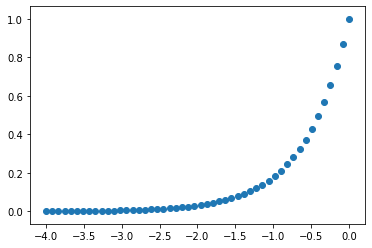

In [399]:
plt.scatter(np.linspace(-4,0,50),pd.DataFrame(params_logReg_L2_refine))

In [409]:
logReg = LogisticRegression(max_iter=2000)
scores=["accuracy","f1"]

# actually it is random search so should be RSCV
logReg_L2_RSCV_refined = RandomizedSearchCV(logReg,params_logReg_L2_refine,scoring=scores,cv=5,n_jobs=-1,refit=False,n_iter=30)
logReg_L2_RSCV_refined.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=2000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': a...
       1.0990e-02, 1.3260e-02, 1.6000e-02, 1.9310e-02, 2.3300e-02,
       2.8120e-02, 3.3930e-02, 4.0950e-02, 4.9420e-02, 5.9640e-02,
       7.1970e-02, 8.6850e-02, 1.0481e-01, 1.2649e-01, 1.5264e-01,
       1.8421e-01, 2.2230e-01, 

In [413]:
logReg_L2_RSCV_refined_res = pd.DataFrame(logReg_L2_RSCV_refined.cv_results_)

In [414]:
logReg_L2_RSCV_refined_res.sort_values(by="mean_test_accuracy",ascending=False).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
23,123.947696,10.222583,0.064323,0.003912,0.01931,{'C': 0.01931},0.814404,0.814716,0.815947,0.814341,0.812359,0.814353,0.001153,1,0.721741,0.723510,0.721497,0.720876,0.719186,0.721362,0.001396,8
11,112.080098,7.240001,0.073690,0.013949,0.016,{'C': 0.016},0.813922,0.814341,0.815787,0.814287,0.811931,0.814054,0.001238,2,0.720142,0.722173,0.720416,0.720142,0.717730,0.720121,0.001415,9
27,112.277517,16.768471,0.062438,0.002276,0.01326,{'C': 0.01326},0.812905,0.814662,0.815733,0.813216,0.811663,0.813636,0.001418,3,0.717588,0.721673,0.719262,0.717754,0.716485,0.718552,0.001793,10
9,142.307679,11.294391,0.066818,0.003673,0.04942,{'C': 0.04942},0.812851,0.812627,0.815091,0.813859,0.812359,0.813357,0.001004,4,0.722817,0.723814,0.722806,0.722364,0.721728,0.722706,0.000682,7
17,141.066831,0.659391,0.068874,0.005040,0.07197,{'C': 0.07197},0.812798,0.811824,0.814127,0.813752,0.812520,0.813004,0.000835,5,0.722935,0.723742,0.721986,0.723309,0.722737,0.722942,0.000588,6
3,122.580433,6.980631,0.102168,0.012174,0.01099,{'C': 0.01099},0.812744,0.813109,0.814823,0.813163,0.811074,0.812983,0.001194,6,0.716682,0.718458,0.716836,0.716549,0.714886,0.716682,0.001133,11
28,132.110797,14.578340,0.051556,0.018029,0.10481,{'C': 0.10481},0.812423,0.811770,0.813216,0.814019,0.813216,0.812929,0.000768,7,0.723455,0.724595,0.721317,0.724998,0.724704,0.723814,0.001354,5
8,184.294768,18.053937,0.077322,0.013443,0.15264,{'C': 0.15264},0.813280,0.811449,0.812467,0.813377,0.813377,0.812790,0.000753,8,0.725584,0.723691,0.720734,0.724179,0.725957,0.724029,0.001851,4
13,142.412759,1.747361,0.064943,0.004306,0.26827,{'C': 0.26827},0.813226,0.811824,0.812199,0.814019,0.812413,0.812736,0.000789,9,0.726303,0.725426,0.720936,0.726126,0.724931,0.724744,0.001967,3
7,192.760912,6.580823,0.138573,0.041241,0.47149,{'C': 0.47149},0.813976,0.810860,0.811235,0.813645,0.813377,0.812618,0.001302,10,0.728339,0.724751,0.720349,0.726243,0.726431,0.725222,0.002690,1


In [411]:
#logReg_L2_RSCV_refined_res.to_csv("logReg_L2_RSCV_refined_res.csv")

testing bigger C values

In [423]:
params_logReg_L2_refine_BIGC = {
    "C":np.round(np.logspace(3,4,50),5)
}

In [422]:
pd.DataFrame(params_logReg_L2_refine_BIGC).describe()

,C
count,50.000000
mean,3941.182178
std,2587.294956
min,1000.000000
25%,1778.650457
50%,3163.150570
75%,5624.568382
max,10000.000000


In [424]:
logReg = LogisticRegression(max_iter=2000)
scores=["accuracy","f1"]

logReg_L2_GSCV_refined_BIGC = RandomizedSearchCV(logReg,params_logReg_L2_refine_BIGC,scoring=scores,cv=5,n_jobs=-1,refit=False,n_iter=30)
logReg_L2_GSCV_refined_BIGC.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=2000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': a...
        3237.45754,  3393.22177,  3556.48031,  3727.59372,  3906.93994,
        4094.91506,  4291.93426,  4498.43267,  4714.86636,  4941.71336,
        5179.47468,  5428.67544,  5689.86603,  5963.62332,  6250.55193,
        6551.285

In [430]:
logReg_L2_GSCV_refined_BIGC_res = pd.DataFrame(logReg_L2_GSCV_refined_BIGC.cv_results_)

In [433]:
logReg_L2_GSCV_refined_BIGC_res["mean_test_accuracy"].describe()

count    30.000000
mean      0.812313
std       0.000182
min       0.811879
25%       0.812203
50%       0.812319
75%       0.812431
max       0.812640
Name: mean_test_accuracy, dtype: float64

In [431]:
logReg_L2_GSCV_refined_BIGC_res.sort_values(by="mean_test_accuracy").head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
11,140.440558,4.617702,0.066485,0.004413,3727.59,{'C': 3727.59372},0.812584,0.810325,0.811074,0.812681,0.812734,0.811879,0.000993,30,0.726904,0.724744,0.719733,0.724610,0.727202,0.724639,0.002675,29
28,137.266812,9.314337,0.068847,0.010565,1757.51,{'C': 1757.51062},0.812905,0.810914,0.811021,0.813109,0.811985,0.811987,0.000915,29,0.726775,0.725235,0.719765,0.726317,0.725209,0.724660,0.002523,28
17,142.014056,2.088629,0.065350,0.001874,2223,{'C': 2222.99648},0.812423,0.812306,0.810539,0.813323,0.811877,0.812094,0.000909,28,0.726691,0.726236,0.719429,0.726674,0.725654,0.724937,0.002780,22
20,140.644796,0.877563,0.064076,0.002583,1048.11,{'C': 1048.11313},0.812262,0.810699,0.811288,0.814448,0.811931,0.812126,0.001279,27,0.725965,0.724838,0.720849,0.729233,0.724765,0.725130,0.002686,17
1,142.077158,4.194658,0.061801,0.003701,1842.07,{'C': 1842.06997},0.813066,0.810485,0.811770,0.813270,0.812092,0.812137,0.001001,26,0.726946,0.725680,0.721363,0.726016,0.725924,0.725186,0.001959,15
5,146.883599,1.443071,0.076204,0.005298,3393.22,{'C': 3393.22177},0.812637,0.810432,0.810860,0.813912,0.812841,0.812137,0.001299,25,0.726833,0.724728,0.719103,0.727430,0.726033,0.724825,0.003001,25
19,140.477190,2.558525,0.067547,0.003447,1206.79,{'C': 1206.79264},0.812744,0.810646,0.811663,0.812948,0.812841,0.812169,0.000891,24,0.726176,0.724739,0.721249,0.724982,0.726932,0.724816,0.001954,26
23,141.523727,1.864881,0.066784,0.003729,8685.11,{'C': 8685.11374},0.813066,0.810217,0.811931,0.813216,0.812574,0.812201,0.001089,23,0.727542,0.723945,0.721226,0.726346,0.726989,0.725209,0.002340,14
8,139.606184,1.663205,0.070313,0.002767,1676.83,{'C': 1676.83294},0.813333,0.810860,0.811503,0.813270,0.812092,0.812211,0.000972,22,0.727954,0.725136,0.720635,0.726703,0.725452,0.725176,0.002480,16
25,140.071677,1.014490,0.070984,0.007696,2023.59,{'C': 2023.58965},0.812851,0.810860,0.811074,0.813859,0.812413,0.812211,0.001121,21,0.726504,0.724536,0.720133,0.727373,0.725921,0.724893,0.002553,23


In [432]:
#logReg_L2_GSCV_refined_BIGC_res.to_csv("logReg_L2_RSCV_refined_BIGC_res.csv")

In [434]:
# estimate test accuracy for this best C
logReg = LogisticRegression(max_iter=2000, C= 3727.59)
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.812363449428094


C:\Users\felix\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Logistic Rregression L1 loss

#### default

In [211]:
logReg_L1_def = LogisticRegression(max_iter=5000,solver="saga",penalty="l1")
logReg_L1_def.fit(X_train,y_train)
y_pred = logReg_L1_def.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_L1_def_res = pd.DataFrame({"accuracy":[acc],
                                  "precision":[prec],
                                  "recall":[rec],
                                  "F1":[f1]})

In [212]:
logReg_L1_def_res

,accuracy,precision,recall,F1
0,0.81155,0.816565,0.640659,0.717995


In [213]:
#logReg_L1_def_res.to_csv("logReg_L1_def_res_5000iter.csv")

#### hyperparameter search

In [138]:
logReg = LogisticRegression(max_iter=1000,solver="saga",penalty="l1")

# logspaced penalization parameter
params_logReg_L1 = {
    "C":np.round(np.logspace(-2,3,100),5)
}

scores=["accuracy","f1"]

logReg_L1_GSCV = GridSearchCV(logReg,params_logReg_L1,scoring=scores,cv=5,n_jobs=-1,refit="accuracy")
logReg_L1_GSCV.fit(X_train,y_train)

C:\Users\felix\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.0000000e-02, 1.1230...
       1.0974988e+02, 1.2328467e+02, 1.3848864e+02, 1.5556761e+02,
       1.7475284e+02, 1.9630407e+02, 2.2051307e+02, 2.4770764e+02,
       2.7825594e+02, 3.1257158e+02, 3.5111917e+02, 3.9442061e+02,
       4.4306215e+02, 4.9770236e+02, 5.5908102e+02, 6.2802914e+02,
       7.0548023e+02, 7.

In [295]:
# summary of tested penalization parameters
pd.DataFrame(params_logReg_L1).describe()

,C
count,100.000000
mean,91.086385
std,200.736196
min,0.010000
25%,0.178047
50%,3.167625
75%,56.306845
max,1000.000000


In [139]:
#pd.set_option("display.max_columns", 42)
logReg_L1_GSCV_res = pd.DataFrame(logReg_L1_GSCV.cv_results_)

In [140]:
#logReg_L1_GSCV_res.to_csv("logReg_L1_GSCV.csv")

look at variation of accuracy and F1 among tested models

In [216]:
logReg_L1_GSCV_res["mean_test_accuracy"].describe()

count    100.000000
mean       0.808771
std        0.000869
min        0.805561
25%        0.809039
50%        0.809138
75%        0.809170
max        0.809202
Name: mean_test_accuracy, dtype: float64

In [217]:
logReg_L1_GSCV_res["mean_test_f1"].describe()

count    100.000000
mean       0.709823
std        0.002095
min        0.701387
25%        0.710403
50%        0.710714
75%        0.710776
max        0.710851
Name: mean_test_f1, dtype: float64

In [294]:
logReg_L1_GSCV_res.sort_values("mean_test_accuracy",ascending=False).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
88,459.818466,2.256755,0.046797,0.003715,278.256,{'C': 278.25594},0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
96,497.203738,5.500952,0.051770,0.014010,705.48,{'C': 705.48023},0.810656,0.809521,0.810003,0.809146,0.806683,0.809202,0.001357,1,0.714424,0.712240,0.709419,0.710479,0.707692,0.710851,0.002318,5
95,462.758378,2.195431,0.047449,0.002797,628.029,{'C': 628.02914},0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
91,462.310080,1.842252,0.044768,0.003938,394.421,{'C': 394.42061},0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
77,455.172436,1.036453,0.042254,0.003498,77.4264,{'C': 77.42637},0.810656,0.809521,0.810003,0.809146,0.806683,0.809202,0.001357,1,0.714424,0.712194,0.709419,0.710479,0.707692,0.710842,0.002312,6
83,457.258422,1.163340,0.044799,0.004740,155.568,{'C': 155.56761},0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
94,460.550613,2.022248,0.050444,0.010683,559.081,{'C': 559.08102},0.810656,0.809468,0.810003,0.809146,0.806683,0.809191,0.001355,7,0.714424,0.712136,0.709419,0.710479,0.707692,0.710830,0.002306,9
75,452.992782,1.885359,0.044939,0.002479,61.3591,{'C': 61.35907},0.810656,0.809468,0.810003,0.809200,0.806630,0.809191,0.001374,7,0.714424,0.712136,0.709419,0.710584,0.707635,0.710840,0.002319,7
81,464.221671,7.503144,0.040621,0.000441,123.285,{'C': 123.28467},0.810656,0.809468,0.810003,0.809200,0.806630,0.809191,0.001374,7,0.714424,0.712136,0.709419,0.710584,0.707635,0.710840,0.002319,7
97,475.965637,15.440066,0.048902,0.010978,792.483,{'C': 792.4829},0.810656,0.809468,0.810003,0.809146,0.806630,0.809181,0.001374,10,0.714424,0.712136,0.709419,0.710432,0.707635,0.710809,0.002323,11


estimate test accuracy of best model

In [228]:
logReg_L1_best_acc_GSCV = LogisticRegression(penalty="l1",solver="saga",C=287.25594,max_iter=5000)
logReg_L1_best_acc_GSCV.fit(X_train,y_train)

y_pred = logReg_L1_best_acc_GSCV.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_L1_best_acc_GSCV_res = pd.DataFrame({"accuracy":[acc],
                                  "precision":[prec],
                                  "recall":[rec],
                                  "F1":[f1]})

In [229]:
logReg_L1_best_acc_GSCV_res

,accuracy,precision,recall,F1
0,0.81155,0.816565,0.640659,0.717995


In [ ]:
#logReg_L1_best_acc_GSCV_res.to_csv("logReg_L1_best_acc_GSCV.csv")

In [259]:
# which coefficients are set to 0
np.where(logReg_L1_best_acc_GSCV.coef_==0)

(array([0, 0, 0, 0], dtype=int64), array([49, 56, 65, 76], dtype=int64))

test if a very small C changes anything in accuracy

In [296]:
logReg_L1_TEMP = LogisticRegression(penalty="l1",solver="saga",C=0.0005,max_iter=5000)
logReg_L1_TEMP.fit(X_train,y_train)


LogisticRegression(C=0.0005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [297]:
y_pred = logReg_L1_TEMP.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_L1_TEMP_res = pd.DataFrame({"accuracy":[acc],
                                  "precision":[prec],
                                  "recall":[rec],
                                  "F1":[f1]})

In [298]:
logReg_L1_TEMP_res

,accuracy,precision,recall,F1
0,0.757658,0.842972,0.433589,0.572637


# Logistic Regression with Elastic Net

In [305]:
logReg = LogisticRegression(max_iter=1000,solver="saga",penalty="elasticnet")

# logspaced penalization parameters
params_logReg_Elastic = {
    "C":np.round(np.logspace(-3,3,100),5),
    "l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

scores=["accuracy","f1"]

logReg_Elastic_GSCV = RandomizedSearchCV(logReg,params_logReg_Elastic,scoring=scores,cv=5,n_jobs=-1,refit=False,n_iter=100)
logReg_Elastic_GSCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='elasticnet',
                                                random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distribution...
       1.2328467e+02, 1.4174742e+02, 1.6297508e+02, 1.8738174e+02,
       2.1544347e+02, 2.4770764e+02, 2.8480359e+02, 3.2745492e+02,
       3.7649358e+02, 4.3287613e+02, 4.9770236e+02,

In [306]:
logReg_Elastic_GSCV_res = pd.DataFrame(logReg_Elastic_GSCV.cv_results_)

In [311]:
logReg_Elastic_GSCV_res.sort_values("mean_test_accuracy",ascending=False).head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
24,439.815832,1.339192,0.040910,0.000515,0.1,247.708,"{'l1_ratio': 0.1, 'C': 247.70764}",0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
61,457.520286,3.396029,0.044914,0.002115,0.3,657.933,"{'l1_ratio': 0.3, 'C': 657.93322}",0.810656,0.809521,0.810003,0.809146,0.806683,0.809202,0.001357,1,0.714424,0.712240,0.709419,0.710479,0.707692,0.710851,0.002318,5
30,456.122945,1.655186,0.043329,0.006493,0.3,70.548,"{'l1_ratio': 0.3, 'C': 70.54802}",0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
80,457.597260,1.966307,0.043748,0.003234,0.2,756.463,"{'l1_ratio': 0.2, 'C': 756.46333}",0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
81,459.164008,2.093212,0.047009,0.012533,0.6,107.227,"{'l1_ratio': 0.6, 'C': 107.22672}",0.810656,0.809468,0.810003,0.809200,0.806683,0.809202,0.001354,1,0.714424,0.712136,0.709419,0.710584,0.707692,0.710851,0.002303,1
67,455.233672,3.396548,0.039567,0.004442,0.3,327.455,"{'l1_ratio': 0.3, 'C': 327.45492}",0.810656,0.809468,0.810003,0.809146,0.806683,0.809191,0.001355,6,0.714424,0.712136,0.709419,0.710526,0.707692,0.710839,0.002304,10
72,459.748789,1.738978,0.043629,0.003238,0.1,432.876,"{'l1_ratio': 0.1, 'C': 432.87613}",0.810656,0.809468,0.810003,0.809146,0.806683,0.809191,0.001355,6,0.714424,0.712136,0.709419,0.710432,0.707692,0.710821,0.002307,14
73,459.643211,1.529598,0.046231,0.007654,0.1,107.227,"{'l1_ratio': 0.1, 'C': 107.22672}",0.810656,0.809468,0.810003,0.809146,0.806683,0.809191,0.001355,6,0.714424,0.712136,0.709419,0.710432,0.707692,0.710821,0.002307,14
75,460.647509,2.683175,0.043791,0.002887,0.7,107.227,"{'l1_ratio': 0.7, 'C': 107.22672}",0.810656,0.809468,0.810003,0.809146,0.806683,0.809191,0.001355,6,0.714424,0.712136,0.709419,0.710479,0.707692,0.710830,0.002306,11
76,459.364107,2.213117,0.042762,0.003477,0.3,284.804,"{'l1_ratio': 0.3, 'C': 284.80359}",0.810656,0.809468,0.810003,0.809200,0.806630,0.809191,0.001374,6,0.714424,0.712136,0.709419,0.710584,0.707635,0.710840,0.002319,6


check variation of accuracy and F1 among tested models

In [310]:
logReg_Elastic_GSCV_res["mean_test_accuracy"].describe()

count    100.000000
mean       0.806575
std        0.005272
min        0.781902
25%        0.807073
50%        0.809138
75%        0.809181
max        0.809202
Name: mean_test_accuracy, dtype: float64

In [316]:
logReg_Elastic_GSCV_res["param_l1_ratio"].value_counts()

0.3    15
0.4    14
0.9    12
0.6    11
0.8    11
0.1    10
0.5    10
0.7     9
0.2     8
Name: param_l1_ratio, dtype: int64

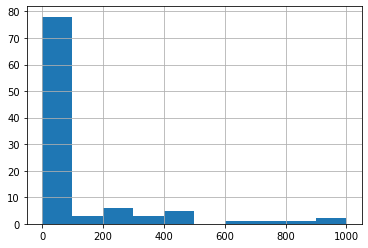

In [328]:
logReg_Elastic_GSCV_res["param_C"].astype(dtype="float").hist()

In [329]:
#logReg_Elastic_GSCV_res.to_csv("logReg_Elastic_GSCV_res.csv")

# Logistic Regression GAM

In [437]:
from pygam.terms import s,l,f
from pygam.pygam import LogisticGAM

In [442]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93371 entries, 8170 to 68268
Data columns (total 82 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       93371 non-null  int64  
 1   arrival_date_week_number        93371 non-null  int64  
 2   arrival_date_day_of_month       93371 non-null  int64  
 3   stays_in_weekend_nights         93371 non-null  int64  
 4   stays_in_week_nights            93371 non-null  int64  
 5   adults                          93371 non-null  int64  
 6   children                        93371 non-null  int64  
 7   babies                          93371 non-null  int64  
 8   previous_cancellations          93371 non-null  int64  
 9   previous_bookings_not_canceled  93371 non-null  int64  
 10  booking_changes                 93371 non-null  int64  
 11  days_in_waiting_list            93371 non-null  int64  
 12  adr                          

create string which represents the formula to be used in the model, f stands for factor effect, l for linear, s for spline

In [10]:
factors = ["f("+str(i)+")+" for i in range(15,82)]
linears = ["l("+str(i)+")+" if not i in [0,1,2,12] else "" for i in range(0,15)]
terms = ""
for i in factors:
    terms = terms+i
for i in linears:
    terms = terms+i
terms = terms+"s(0)+"+"s(1,basis=\"cp\")+"+"s(2,basis=\"cp\")+"+"s(12)+"
terms = terms+"s(0,by=15)+"+"s(1,basis=\"cp\",by=15)+"+"s(2,basis=\"cp\",by=15)+"+"s(12,by=15)"
print(terms)

f(15)+f(16)+f(17)+f(18)+f(19)+f(20)+f(21)+f(22)+f(23)+f(24)+f(25)+f(26)+f(27)+f(28)+f(29)+f(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)+f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)+f(52)+f(53)+f(54)+f(55)+f(56)+f(57)+f(58)+f(59)+f(60)+f(61)+f(62)+f(63)+f(64)+f(65)+f(66)+f(67)+f(68)+f(69)+f(70)+f(71)+f(72)+f(73)+f(74)+f(75)+f(76)+f(77)+f(78)+f(79)+f(80)+f(81)+l(3)+l(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(13)+l(14)+s(0)+s(1,basis="cp")+s(2,basis="cp")+s(12)+s(0,by=15)+s(1,basis="cp",by=15)+s(2,basis="cp",by=15)+s(12,by=15)


creating search space for the 9 penalization parameters

In [49]:
lam = np.random.rand(1000,9)*6-2
lam = np.round(np.exp(lam),5)
lam_df = pd.DataFrame(lam)

lam_df
l = lam_df.iloc[:,0]

for i in range(77):
    lam_df = pd.concat([l,lam_df],axis=1)
lam_df.columns = range(86)
lam_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,3.51991,3.51991,3.51991,3.51991,3.51991,3.51991,3.51991,3.51991,3.51991,3.51991,...,3.51991,3.51991,30.36049,0.22615,3.44641,6.39004,0.31848,10.15331,1.79153,0.17351
1,3.01528,3.01528,3.01528,3.01528,3.01528,3.01528,3.01528,3.01528,3.01528,3.01528,...,3.01528,3.01528,1.88832,0.72280,4.25757,34.88723,0.19684,0.67856,0.20346,24.17264
2,0.20479,0.20479,0.20479,0.20479,0.20479,0.20479,0.20479,0.20479,0.20479,0.20479,...,0.20479,0.20479,0.39920,31.62956,0.27944,0.14831,8.03510,0.44525,0.38912,10.61613
3,3.30325,3.30325,3.30325,3.30325,3.30325,3.30325,3.30325,3.30325,3.30325,3.30325,...,3.30325,3.30325,14.69878,1.82778,6.83420,13.53045,0.41392,4.38487,1.00804,37.11836
4,9.38732,9.38732,9.38732,9.38732,9.38732,9.38732,9.38732,9.38732,9.38732,9.38732,...,9.38732,9.38732,1.58179,1.63220,3.86701,13.21250,8.54933,0.23293,7.85041,3.79705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,50.20747,50.20747,50.20747,50.20747,50.20747,50.20747,50.20747,50.20747,50.20747,50.20747,...,50.20747,50.20747,1.35189,0.46358,22.52428,0.65301,0.29059,1.23400,0.20537,8.58981
996,5.33505,5.33505,5.33505,5.33505,5.33505,5.33505,5.33505,5.33505,5.33505,5.33505,...,5.33505,5.33505,19.81958,9.84946,22.75899,19.53926,8.52809,1.14194,4.48271,0.70681
997,7.54746,7.54746,7.54746,7.54746,7.54746,7.54746,7.54746,7.54746,7.54746,7.54746,...,7.54746,7.54746,3.51258,0.72379,1.55280,1.00087,50.44634,3.06403,7.57592,0.29886
998,0.93086,0.93086,0.93086,0.93086,0.93086,0.93086,0.93086,0.93086,0.93086,0.93086,...,0.93086,0.93086,0.18038,1.15729,0.56088,4.51016,0.21423,12.56952,0.92150,32.01169


In [133]:
params = lam_df.iloc[0:50,:].values
#params[0].tolist()

In [236]:
params.shape

(50, 86)

In [237]:
###################
# SAVING THE SEARCH SPACE, BECAUSE THE PARAMETERS ARE RANDOM, SO THIS WAY WE CAN REPRODUCE IT
###################
#lam_df.to_csv("Lambda_Params_GAM.csv")

In [238]:
############################
# SAVING THE USED RANDOM PARAMETERS VALUES FOR OPTIMIZATION
############################
#pd.DataFrame(params).to_csv("Lambda_Params_selectionForCV_GAM.csv")

#### hyperparameter search
by self implemented Cross Validation, considering only 50 combinations of all the 1000 created above

In [146]:
from pygam.terms import s,l,f
from pygam.pygam import LogisticGAM

skf = StratifiedKFold(n_splits=5,shuffle=True)
skf_split = skf.split(X_train,y_train)

logReg_GAM = LogisticGAM(f(15)+f(16)+f(17)+f(18)+f(19)+f(20)+f(21)+f(22)+f(23)+f(24)+f(25)+f(26)+f(27)+f(28)+f(29)+f(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)+f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)+f(52)+f(53)+f(54)+f(55)+f(56)+f(57)+f(58)+f(59)+f(60)+f(61)+f(62)+f(63)+f(64)+f(65)+f(66)+f(67)+f(68)+f(69)+f(70)+f(71)+f(72)+f(73)+f(74)+f(75)+f(76)+f(77)+f(78)+f(79)+f(80)+f(81)+l(3)+l(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(13)+l(14)+s(0)+s(1,basis="cp")+s(2,basis="cp")+s(12)+s(0,by=15)+s(1,basis="cp",by=15)+s(2,basis="cp",by=15)+s(12,by=15),
                        max_iter=2000)
  

logReg_GAM_res = pd.DataFrame()
k=0
for k_train, k_test in skf_split:
    
    X_train_k = X_train.iloc[k_train,:]
    y_train_k = y_train.iloc[k_train]
    X_test_k = X_train.iloc[k_test,:]
    y_test_k = y_train.iloc[k_test]
    
    accs = [acc]
    f1s = [f1]
    print(k)
    for i in range(params.shape[0]):
        logReg_GAM.set_params(lam=params[i].tolist())
        logReg_GAM.fit(X_train_k,y_train_k)
        print(i)
        try:
            y_pred = logReg_GAM.predict(X_test_k)
            acc = accuracy_score(y_test_k,y_pred)
            f1 = f1_score(y_test_k,y_pred)
        except Exception as e:
            #print(e)
            acc=np.nan
            f1=np.nan

        accs.append(acc)
        f1s.append(f1)
        
    
    df = pd.DataFrame({"Acc_split_"+str(k):accs,
                       "F1_split_"+str(k):f1s})
    
    logReg_GAM_res = pd.concat([logReg_GAM_res,df],axis=1)
    k = k+1

0


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


0


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


1


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


2


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


3


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


4


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


5


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


6


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


7


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


8


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


9


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


10


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


11


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


12


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


13


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


14


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


15


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


16


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


17


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


18


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


19


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


20


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


21


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


22


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


23


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


24


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


25


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


26


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


27


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


28


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


29


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


30


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


31


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


32


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


33


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


34


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


35


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


36


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


37


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


38


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


39


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


40


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


41


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


42


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


43


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


44


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


45


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


46


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


47


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


48


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


49
1


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


0


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


1


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


2


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


3


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


4


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


5


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


6


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


7


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


8


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


9


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


10


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


11


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


12


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


13


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


14


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


15


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


16


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


17


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


18


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


19


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


20


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


21


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


22


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


23


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


24


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


25


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


26


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


27


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


28


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


29


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


30


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


31


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


32


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


33


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


34


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


35


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


36


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


37


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


38


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


39


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


40


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


41


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


42


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


43


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


44


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


45


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


46


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


47


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


48


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


49
2


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


0


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


1


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


2


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


3


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


4


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


5


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


6


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


7


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


8


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


9


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


10


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


11


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


12


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


13


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


14


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


15


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


16


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


17


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


18


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


19


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


20


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


21


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


22


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


23


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


24


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


25


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


26


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


27


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


28


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


29


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


30


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


31


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


32


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


33


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


34


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


35


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


36


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


37


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


38


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


39


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


40


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


41


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


42


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


43


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


44


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


45


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


46


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


47


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


48


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


49
3


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


0


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


1


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


2


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


3


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


4


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


5


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


6


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


7


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


8


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


9


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


10


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


11


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


12


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


13


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


14


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


15


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


16


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


17


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


18


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


19


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


20


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


21


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


22


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


23


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


24


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


25


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


26


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


27


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


28


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


29


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


30


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


31


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


32


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


33


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


34


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


35


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


36


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


37


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


38


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


39


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


40


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


41


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


42


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


43


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


44


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


45


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


46


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


47


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


48


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


49
4


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


0


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


1


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


2


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


3


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


4


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


5


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


6


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


7


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


8


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


9


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


10


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


11


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


12


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


13


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


14


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


15


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


16


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


17


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


18


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


19


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


20


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


21


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


22


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


23


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


24


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


25


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


26


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


27


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


28


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


29


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


30


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


31


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


32


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


33


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


34


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


35


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


36


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


37


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


38


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


39


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


40


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


41


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


42


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


43


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


44


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


45


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


46


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


47


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


48


C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


49


IndexError: positional indexers are out-of-bounds

In [154]:
logReg_GAM_res["meanAcc"] = logReg_GAM_res.iloc[:,[0,2,4,6,8]].apply(np.mean,axis=1)
logReg_GAM_res["meanF1"] = logReg_GAM_res.iloc[:,[1,3,5,7,9]].apply(np.mean,axis=1)

In [155]:
#logReg_GAM_res.to_csv("logReg_GAM_RSCV.csv")

looking at variation among accuracy and F1 among tested models

In [232]:
logReg_GAM_res["meanAcc"].describe()

count    51.000000
mean      0.828659
std       0.000807
min       0.826861
25%       0.828099
50%       0.828480
75%       0.829364
max       0.830060
Name: meanAcc, dtype: float64

In [233]:
logReg_GAM_res["meanF1"].describe()

count    51.000000
mean      0.753842
std       0.002499
min       0.747704
25%       0.752713
50%       0.754194
75%       0.756053
max       0.757236
Name: meanF1, dtype: float64

In [235]:
logReg_GAM_res.sort_values("meanAcc",ascending=False)

,Acc_split_0,F1_split_0,Acc_split_1,F1_split_1,Acc_split_2,F1_split_2,Acc_split_3,F1_split_3,Acc_split_4,F1_split_4,meanAcc,meanF1
27,0.827952,0.754377,0.829442,0.756182,0.829549,0.755361,NaN,NaN,0.833298,0.761620,0.830060,0.756885
24,0.827898,0.753641,0.829335,0.755504,0.828853,0.753737,NaN,NaN,0.833512,0.761012,0.829899,0.755974
10,0.827738,0.754634,0.828639,0.755800,0.829817,0.756288,NaN,NaN,0.833244,0.762217,0.829859,0.757235
42,0.827631,0.754743,0.828478,0.755328,0.829924,0.756777,NaN,NaN,0.833298,0.762094,0.829833,0.757236
34,0.828327,0.755267,0.829067,0.755739,0.828371,0.754124,NaN,NaN,0.833244,0.761635,0.829752,0.756691
21,0.828220,0.755152,0.829228,0.756398,0.828799,0.755150,NaN,NaN,0.832709,0.761016,0.829739,0.756929
40,0.827309,0.754435,0.828585,0.756003,0.829067,0.755590,NaN,NaN,0.833512,0.762654,0.829618,0.757170
25,0.828327,0.753612,0.829388,0.754432,0.827728,0.751256,NaN,NaN,0.832441,0.758770,0.829471,0.754518
26,0.826827,0.753243,0.828853,0.755657,0.829603,0.756467,NaN,NaN,0.832548,0.761170,0.829458,0.756634
48,0.827952,0.754151,0.828585,0.755144,0.828371,0.753632,NaN,NaN,0.832923,0.761029,0.829458,0.755989


Taking best GAM model and evaluate test performance

In [239]:
logReg_GAM_best_acc_RSCV = LogisticGAM(f(15)+f(16)+f(17)+f(18)+f(19)+f(20)+f(21)+f(22)+f(23)+f(24)+f(25)+f(26)+f(27)+f(28)+f(29)+f(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)+f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)+f(52)+f(53)+f(54)+f(55)+f(56)+f(57)+f(58)+f(59)+f(60)+f(61)+f(62)+f(63)+f(64)+f(65)+f(66)+f(67)+f(68)+f(69)+f(70)+f(71)+f(72)+f(73)+f(74)+f(75)+f(76)+f(77)+f(78)+f(79)+f(80)+f(81)+l(3)+l(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(13)+l(14)+s(0)+s(1,basis="cp")+s(2,basis="cp")+s(12)+s(0,by=15)+s(1,basis="cp",by=15)+s(2,basis="cp",by=15)+s(12,by=15),
                                       max_iter=2000)

logReg_GAM_best_acc_RSCV.set_params(lam=params[27].tolist())
logReg_GAM_best_acc_RSCV.fit(X_train,y_train)

C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=2000, 
   terms=f(15) + f(16) + f(17) + f(18) + f(19) + f(20) + f(21) + f(22) + f(23) + f(24) + f(25) + f(26) + f(27) + f(28) + f(29) + f(30) + f(31) + f(32) + f(33) + f(34) + f(35) + f(36) + f(37) + f(38) + f(39) + f(40) + f(41) + f(42) + f(43) + f(44) + f(45) + f(46) + f(47) + f(48) + f(49) + f(50) + f(51) + f(52) + f(53) + f(54) + f(55) + f(56) + f(57) + f(58) + f(59) + f(60) + f(61) + f(62) + f(63) + f(64) + f(65) + f(66) + f(67) + f(68) + f(69) + f(70) + f(71) + f(72) + f(73) + f(74) + f(75) + f(76) + f(77) + f(78) + f(79) + f(80) + f(81) + l(3) + l(4) + l(5) + l(6) + l(7) + l(8) + l(9) + l(10) + l(11) + l(13) + l(14) + s(0) + s(1) + s(2) + s(12) + s(0) + s(1) + s(2) + s(12) + intercept,
   tol=0.0001, verbose=False)

In [240]:
y_pred = logReg_GAM_best_acc_RSCV.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_GAM_best_acc_RSCV_res = pd.DataFrame({"accuracy":[acc],
                                             "precision":[prec],
                                             "recall":[rec],
                                             "F1":[f1]})

In [241]:
logReg_GAM_best_acc_RSCV_res

,accuracy,precision,recall,F1
0,0.831298,0.819391,0.704839,0.757811


In [242]:
#logReg_GAM_best_acc_RSCV_res.to_csv("logReg_GAM_best_acc_RSCV.csv")

summary of model, showing significance

In [256]:
logReg_GAM_best_acc_RSCV.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    164.3179
Link Function:                        LogitLink Log Likelihood:                                -33802.1385
Number of Samples:                        93371 AIC:                                            67932.9128
                                                AICc:                                           67933.5028
                                                UBRE:                                                2.729
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4534
Feature Function                  Lam

C:\Users\felix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [ ]:
#######
# following variables are with not significant effect
#######

'''
15,16,49!,56!,65!,75,76!,78,79,81,7
'''

#### Default GAM Model

In [7]:
logReg_GAM_def = LogisticGAM(f(15)+f(16)+f(17)+f(18)+f(19)+f(20)+f(21)+f(22)+f(23)+f(24)+f(25)+f(26)+f(27)+f(28)+f(29)+f(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)+f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)+f(52)+f(53)+f(54)+f(55)+f(56)+f(57)+f(58)+f(59)+f(60)+f(61)+f(62)+f(63)+f(64)+f(65)+f(66)+f(67)+f(68)+f(69)+f(70)+f(71)+f(72)+f(73)+f(74)+f(75)+f(76)+f(77)+f(78)+f(79)+f(80)+f(81)+l(3)+l(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(13)+l(14)+s(0)+s(1,basis="cp")+s(2,basis="cp")+s(12)+s(0,by=15)+s(1,basis="cp",by=15)+s(2,basis="cp",by=15)+s(12,by=15),max_iter=2000)

logReg_GAM_def.fit(X_train,y_train)

y_pred = logReg_GAM_def.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_GAM_def_res = pd.DataFrame({"accuracy":[acc],
                                             "precision":[prec],
                                             "recall":[rec],
                                             "F1":[f1]})

C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


In [8]:
logReg_GAM_def_res

,accuracy,precision,recall,F1
0,0.830956,0.816418,0.707699,0.758181


In [440]:
logReg_GAM_def_res.to_csv("logReg_GAM_def_res.csv")

### LogReg GAM different gridsearch method with different evaluation metric and full random lambda set

using UBRE Un-biased Risk Estimator, smaller are better

In [156]:
from pygam.terms import s,l,f
from pygam.pygam import LogisticGAM

logReg_GAM_2 = LogisticGAM(f(15)+f(16)+f(17)+f(18)+f(19)+f(20)+f(21)+f(22)+f(23)+f(24)+f(25)+f(26)+f(27)+f(28)+f(29)+f(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)+f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)+f(52)+f(53)+f(54)+f(55)+f(56)+f(57)+f(58)+f(59)+f(60)+f(61)+f(62)+f(63)+f(64)+f(65)+f(66)+f(67)+f(68)+f(69)+f(70)+f(71)+f(72)+f(73)+f(74)+f(75)+f(76)+f(77)+f(78)+f(79)+f(80)+f(81)+l(3)+l(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(13)+l(14)+s(0)+s(1,basis="cp")+s(2,basis="cp")+s(12)+s(0,by=15)+s(1,basis="cp",by=15)+s(2,basis="cp",by=15)+s(12,by=15),
                        max_iter=2000)

##############################
# USING FULL LAMS DATAFRAME
##############################
logReg_GAM_2_res_MoreParams = logReg_GAM_2.gridsearch(X_train.values,y_train.values,return_scores=True,lam=lam_df.values)



N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  0% (1 of 1000) |                       | Elapsed Time: 0:00:37 ETA:  10:19:35C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

  2% (28 of 1000) |                      | Elapsed Time: 0:13:42 ETA:   5:07:22C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  2% (29 of 1000) |                      | Elapsed Time: 0:14:09 ETA:   7:23:27C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

  5% (56 of 1000) |#                     | Elapsed Time: 0:26:41 ETA:   7:14:48C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  5% (57 of 1000) |#                     | Elapsed Time: 0:27:09 ETA:   7:15:06C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

  8% (84 of 1000) |#                     | Elapsed Time: 0:40:13 ETA:   7:06:40C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  8% (85 of 1000) |#                     | Elapsed Time: 0:40:41 ETA:   7:00:15C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 11% (112 of 1000) |##                   | Elapsed Time: 0:54:27 ETA:   5:44:45C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 11% (113 of 1000) |##                   | Elapsed Time: 0:54:58 ETA:   7:49:48C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 14% (140 of 1000) |##                   | Elapsed Time: 1:08:27 ETA:   7:36:20C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 14% (141 of 1000) |##                   | Elapsed Time: 1:09:03 ETA:   8:32:39C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 16% (168 of 1000) |###                  | Elapsed Time: 1:22:28 ETA:   7:54:32C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 16% (169 of 1000) |###                  | Elapsed Time: 1:23:05 ETA:   8:39:10C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 19% (196 of 1000) |####                 | Elapsed Time: 1:34:34 ETA:   4:21:31C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 19% (197 of 1000) |####                 | Elapsed Time: 1:34:57 ETA:   5:06:18C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 22% (224 of 1000) |####                 | Elapsed Time: 1:46:42 ETA:   4:09:43C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 22% (225 of 1000) |####                 | Elapsed Time: 1:47:08 ETA:   5:44:24C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 25% (252 of 1000) |#####                | Elapsed Time: 2:01:24 ETA:   6:34:37C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 25% (253 of 1000) |#####                | Elapsed Time: 2:01:52 ETA:   5:49:59C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 28% (280 of 1000) |#####                | Elapsed Time: 2:15:46 ETA:   3:50:43C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 28% (281 of 1000) |#####                | Elapsed Time: 2:16:14 ETA:   5:32:02C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 30% (308 of 1000) |######               | Elapsed Time: 2:30:33 ETA:   6:07:21C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 30% (309 of 1000) |######               | Elapsed Time: 2:31:00 ETA:   5:12:03C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 33% (336 of 1000) |#######              | Elapsed Time: 2:43:39 ETA:   4:12:32C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 33% (337 of 1000) |#######              | Elapsed Time: 2:44:02 ETA:   4:13:39C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 36% (364 of 1000) |#######              | Elapsed Time: 2:55:15 ETA:   5:23:39C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 36% (365 of 1000) |#######              | Elapsed Time: 2:55:45 ETA:   5:18:33C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 39% (392 of 1000) |########             | Elapsed Time: 3:07:22 ETA:   3:57:05C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 39% (393 of 1000) |########             | Elapsed Time: 3:07:49 ETA:   4:33:56C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 42% (420 of 1000) |########             | Elapsed Time: 3:19:25 ETA:   3:52:18C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 42% (421 of 1000) |########             | Elapsed Time: 3:19:48 ETA:   3:49:00C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 44% (448 of 1000) |#########            | Elapsed Time: 3:30:43 ETA:   3:32:56C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 44% (449 of 1000) |#########            | Elapsed Time: 3:31:12 ETA:   4:24:48C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 47% (476 of 1000) |#########            | Elapsed Time: 3:42:23 ETA:   2:47:52C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 47% (477 of 1000) |##########           | Elapsed Time: 3:42:42 ETA:   2:47:14C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 50% (504 of 1000) |##########           | Elapsed Time: 3:54:20 ETA:   4:06:54C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 50% (505 of 1000) |##########           | Elapsed Time: 3:54:39 ETA:   2:38:21C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 53% (532 of 1000) |###########          | Elapsed Time: 4:08:01 ETA:   4:07:34C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 53% (533 of 1000) |###########          | Elapsed Time: 4:08:41 ETA:   5:12:36C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 56% (560 of 1000) |###########          | Elapsed Time: 4:21:47 ETA:   2:52:06C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 56% (561 of 1000) |###########          | Elapsed Time: 4:22:23 ETA:   4:25:58C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 58% (588 of 1000) |############         | Elapsed Time: 4:36:20 ETA:   3:11:48C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 58% (589 of 1000) |############         | Elapsed Time: 4:36:48 ETA:   3:10:54C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 61% (616 of 1000) |############         | Elapsed Time: 4:50:04 ETA:   2:33:36C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 61% (617 of 1000) |############         | Elapsed Time: 4:50:41 ETA:   3:53:29C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 64% (644 of 1000) |#############        | Elapsed Time: 5:03:41 ETA:   2:36:48C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 64% (645 of 1000) |#############        | Elapsed Time: 5:04:04 ETA:   2:16:41C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 67% (672 of 1000) |##############       | Elapsed Time: 5:15:23 ETA:   2:26:48C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 67% (673 of 1000) |##############       | Elapsed Time: 5:15:47 ETA:   2:08:35C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 70% (700 of 1000) |##############       | Elapsed Time: 5:27:03 ETA:   2:14:47C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 70% (701 of 1000) |##############       | Elapsed Time: 5:27:31 ETA:   2:19:25C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 72% (728 of 1000) |###############      | Elapsed Time: 5:38:51 ETA:   2:22:21C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 72% (729 of 1000) |###############      | Elapsed Time: 5:39:14 ETA:   1:44:08C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 75% (756 of 1000) |###############      | Elapsed Time: 5:51:07 ETA:   1:36:25C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 75% (757 of 1000) |###############      | Elapsed Time: 5:51:34 ETA:   1:49:00C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 78% (784 of 1000) |################     | Elapsed Time: 6:03:26 ETA:   1:37:43C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 78% (785 of 1000) |################     | Elapsed Time: 6:03:53 ETA:   1:36:24C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 81% (812 of 1000) |#################    | Elapsed Time: 6:15:39 ETA:   1:04:59C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 81% (813 of 1000) |#################    | Elapsed Time: 6:15:59 ETA:   1:03:30C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 84% (840 of 1000) |#################    | Elapsed Time: 6:27:39 ETA:   1:09:08C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 84% (841 of 1000) |#################    | Elapsed Time: 6:28:05 ETA:   1:09:26C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 86% (868 of 1000) |##################   | Elapsed Time: 6:39:17 ETA:   0:49:36C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 86% (869 of 1000) |##################   | Elapsed Time: 6:39:47 ETA:   1:06:09C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 89% (896 of 1000) |##################   | Elapsed Time: 6:50:54 ETA:   0:39:08C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 89% (897 of 1000) |##################   | Elapsed Time: 6:51:21 ETA:   0:45:12C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 92% (924 of 1000) |###################  | Elapsed Time: 7:02:21 ETA:   0:24:02C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 92% (925 of 1000) |###################  | Elapsed Time: 7:02:47 ETA:   0:32:26C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 95% (952 of 1000) |###################  | Elapsed Time: 7:14:35 ETA:   0:18:07C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 95% (953 of 1000) |#################### | Elapsed Time: 7:14:54 ETA:   0:14:55C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

 98% (980 of 1000) |#################### | Elapsed Time: 7:25:28 ETA:   0:07:35C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 98% (981 of 1000) |#################### | Elapsed Time: 7:25:51 ETA:   0:07:13C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\l

In [157]:
logReg_GAM_3_Params_score = pd.concat([lam_df,pd.DataFrame({"score":list(dict(logReg_GAM_2_res_MoreParams).values())})],axis=1)

In [ ]:
#logReg_GAM_3_Params_score.to_csv("logReg_GAM_MOREparams_and_res.csv")

look at variance of scores among tested models

In [243]:
logReg_GAM_3_Params_score["score"].describe()

count    1000.000000
mean        2.731114
std         0.003675
min         2.727050
25%         2.728325
50%         2.730168
75%         2.732435
max         2.745197
Name: score, dtype: float64

In [249]:
logReg_GAM_3_Params_score.iloc[:,76:].sort_values("score",ascending=True)

,76,77,78,79,80,81,82,83,84,85,score
802,0.22942,0.22942,0.14462,1.42949,8.64193,5.65952,4.67265,6.43696,1.08488,0.24409,2.727050
218,0.14936,0.14936,0.33079,4.06625,5.62060,0.38847,14.59156,10.46948,0.96359,0.50859,2.727106
746,0.27833,0.27833,0.15032,0.25401,41.80597,0.32028,1.10164,0.21292,6.45972,0.82486,2.727121
21,0.13724,0.13724,0.44631,5.32608,11.68378,0.64562,5.94890,2.40991,5.09016,0.22892,2.727125
230,0.32309,0.32309,0.26694,3.45341,12.87593,6.62107,32.61905,2.22562,12.67265,1.93115,2.727149
...,...,...,...,...,...,...,...,...,...,...,...
574,48.36984,48.36984,21.68450,51.64437,36.85707,0.98610,12.06314,2.09778,15.99383,2.31840,2.744367
244,46.08488,46.08488,53.24436,5.31025,1.00399,21.99828,0.20234,51.42350,0.20748,16.43909,2.744813
100,53.91953,53.91953,9.12342,1.07670,7.57142,17.13594,4.04084,19.55407,4.38299,37.61968,2.744986
285,48.36501,48.36501,41.10837,1.64769,4.39517,33.39750,2.29438,0.64436,10.66372,2.84118,2.745134


extract best model

In [251]:
logReg_GAM_best_UBRE_RS = LogisticGAM(f(15)+f(16)+f(17)+f(18)+f(19)+f(20)+f(21)+f(22)+f(23)+f(24)+f(25)+f(26)+f(27)+f(28)+f(29)+f(30)+f(31)+f(32)+f(33)+f(34)+f(35)+f(36)+f(37)+f(38)+f(39)+f(40)+f(41)+f(42)+f(43)+f(44)+f(45)+f(46)+f(47)+f(48)+f(49)+f(50)+f(51)+f(52)+f(53)+f(54)+f(55)+f(56)+f(57)+f(58)+f(59)+f(60)+f(61)+f(62)+f(63)+f(64)+f(65)+f(66)+f(67)+f(68)+f(69)+f(70)+f(71)+f(72)+f(73)+f(74)+f(75)+f(76)+f(77)+f(78)+f(79)+f(80)+f(81)+l(3)+l(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(13)+l(14)+s(0)+s(1,basis="cp")+s(2,basis="cp")+s(12)+s(0,by=15)+s(1,basis="cp",by=15)+s(2,basis="cp",by=15)+s(12,by=15),
                                        max_iter=2000)

logReg_GAM_best_UBRE_RS.set_params(lam=lam_df.values[802].tolist())
logReg_GAM_best_UBRE_RS.fit(X_train,y_train)

C:\Users\felix\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\felix\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=2000, 
   terms=f(15) + f(16) + f(17) + f(18) + f(19) + f(20) + f(21) + f(22) + f(23) + f(24) + f(25) + f(26) + f(27) + f(28) + f(29) + f(30) + f(31) + f(32) + f(33) + f(34) + f(35) + f(36) + f(37) + f(38) + f(39) + f(40) + f(41) + f(42) + f(43) + f(44) + f(45) + f(46) + f(47) + f(48) + f(49) + f(50) + f(51) + f(52) + f(53) + f(54) + f(55) + f(56) + f(57) + f(58) + f(59) + f(60) + f(61) + f(62) + f(63) + f(64) + f(65) + f(66) + f(67) + f(68) + f(69) + f(70) + f(71) + f(72) + f(73) + f(74) + f(75) + f(76) + f(77) + f(78) + f(79) + f(80) + f(81) + l(3) + l(4) + l(5) + l(6) + l(7) + l(8) + l(9) + l(10) + l(11) + l(13) + l(14) + s(0) + s(1) + s(2) + s(12) + s(0) + s(1) + s(2) + s(12) + intercept,
   tol=0.0001, verbose=False)

estimate test performance

In [252]:
y_pred = logReg_GAM_best_UBRE_RS.predict(X_test)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

logReg_GAM_best_UBRE_RS_res = pd.DataFrame({"accuracy":[acc],
                                             "precision":[prec],
                                             "recall":[rec],
                                             "F1":[f1]})

In [253]:
logReg_GAM_best_UBRE_RS_res

,accuracy,precision,recall,F1
0,0.830527,0.814678,0.708615,0.757954


In [254]:
#logReg_GAM_best_UBRE_RS_res.to_csv("logReg_GAM_best_UBRE_RS_res.csv")